# Alpesh Patel

## LetsGrowMore Data Science Intern

# Task - 1
**ADVANCED LEVEL TASK**
# Develop A Neural Network That Can Read Handwriting

# Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import model_from_json

# Download MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [2]:
(train_img, train_labels), (test_img, test_labels) = datasets.mnist.load_data()

# Normalize Images

In [3]:
# Normalize pixal value tobe between 0 and 1
train_img, test_img = train_img/255.0, test_img/255.0

In [4]:
len(train_img)

60000

In [5]:
len(test_img)

10000

# Visualizing Images

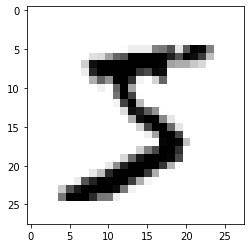

In [6]:
plt.imshow(train_img[0], cmap=plt.cm.gray_r, interpolation='nearest')


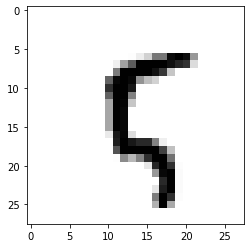

In [7]:
plt.imshow(train_img[100], cmap=plt.cm.gray_r, interpolation='nearest')


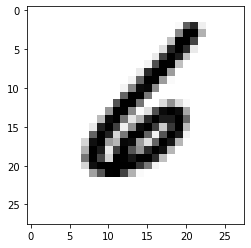

In [8]:
plt.imshow(train_img[999], cmap=plt.cm.gray_r, interpolation='nearest')


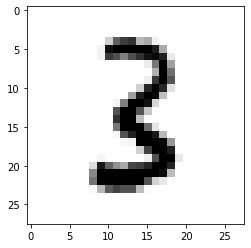

In [9]:
plt.imshow(train_img[50000], cmap=plt.cm.gray_r, interpolation='nearest')


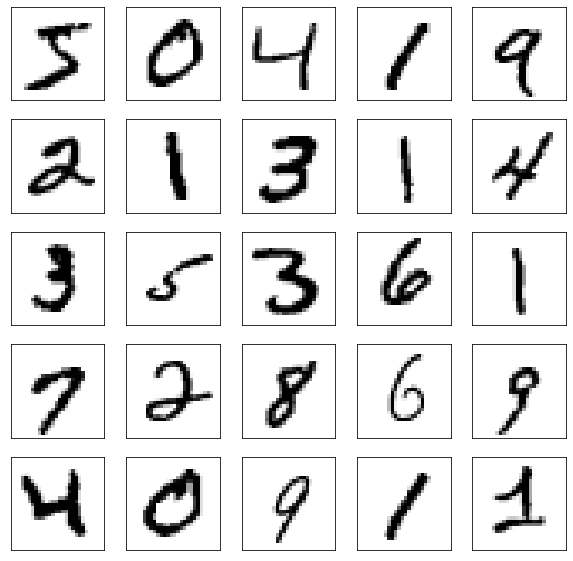

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
plt.show()

# Create and train the model

## Sequential model

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  
  tf.keras.layers.Dense(128,activation='relu'),
  
  tf.keras.layers.Dense(10)
])

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [13]:
model.fit(
    train_img, train_labels,
    epochs= 10,
    validation_data=(test_img, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2586 - sparse_categorical_accuracy: 0.9268 - val_loss: 0.1416 - val_sparse_categorical_accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1054 - val_sparse_categorical_accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0790 - sparse_categorical_accuracy: 0.9763 - val_loss: 0.0872 - val_sparse_categorical_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - sparse_categorical_accuracy: 0.9822 - val_loss: 0.0757 - val_sparse_categorical_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0456 - sparse_categorical_accuracy: 0.9855 - val_loss: 0.0730 - val_sparse_categorical_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - spar

# Model Summary

## summary() method will display the architecture of the model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Flatten

In [15]:
model.add(layers.Flatten())

# Adding Dense layer

In [16]:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# Train the Model

In [18]:
model.fit(train_img, train_labels, epochs=12, 
                    validation_data=(test_img, test_labels))

Epoch 1/12
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1103 - accuracy: 0.9710 - val_loss: 0.0821 - val_accuracy: 0.9772
Epoch 2/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0901 - val_accuracy: 0.9772
Epoch 3/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0187 - accuracy: 0.9934 - val_loss: 0.0885 - val_accuracy: 0.9774
Epoch 4/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0146 - accuracy: 0.9948 - val_loss: 0.1053 - val_accuracy: 0.9769
Epoch 5/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.1191 - val_accuracy: 0.9769
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.1087 - val_accuracy: 0.9794
Epoch 7/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.1264 - val_accuracy:

# Model Summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 103,124
Trainable params: 103,124
Non-trainable params: 0
__________________________________________________

# Save model and Load
## Saved model to disk

In [20]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [21]:
# Serialize weights to HDF5
model.save_weights("mymodel.h5")
print("Saved model to disk")

Saved model to disk


## Loaded model from disk

In [22]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

In [23]:
# load weights into new model
model.load_weights("mymodel.h5")
print("Loaded model from disk")

Loaded model from disk


### The Accuracy of model is **99 % Percentage**